In [1]:
#Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder



In [4]:
#Step 2: Load and Preprocess the Dataset
(X_train,y_train),(_,_)=mnist.load_data()
X_train=X_train.reshape(-1,784)/255.0
encoder=OneHotEncoder(sparse_output=False)
y_train=encoder.fit_transform(y_train.reshape(-1,1))
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [5]:
#Step 3: Initialize the Network
input_size, hidden_size, output_size = 784, 64, 10
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [6]:
#Step 4: Define Activation and Loss Functions
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_deriv = lambda x: x * (1 - x)
loss_fn = lambda y, y_hat: -np.mean(y * np.log(y_hat + 1e-8))

In [7]:
# Step 5: Train the model
epochs, lr = 10, 0.1
losses = []

for epoch in range(epochs):
  total_loss = 0
  for i in range(X_train.shape[0]):
    x = X_train[i:i+1]
    y = y_train[i:i+1]
    z1 = x @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    loss = loss_fn(y, a2)
    total_loss += loss
    dz2 = a2 - y
    dW2 = a1.T @ dz2
    db2 = dz2
    dz1 = (dz2 @ W2.T) * sigmoid_deriv(a1)
    dW1 = x.T @ dz1
    db1 = dz1
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1
  losses.append(total_loss / X_train.shape[0])
  print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")

Epoch 1, Loss: 0.0274
Epoch 2, Loss: 0.0156
Epoch 3, Loss: 0.0127
Epoch 4, Loss: 0.0111
Epoch 5, Loss: 0.0097
Epoch 6, Loss: 0.0089
Epoch 7, Loss: 0.0081
Epoch 8, Loss: 0.0075
Epoch 9, Loss: 0.0070
Epoch 10, Loss: 0.0064


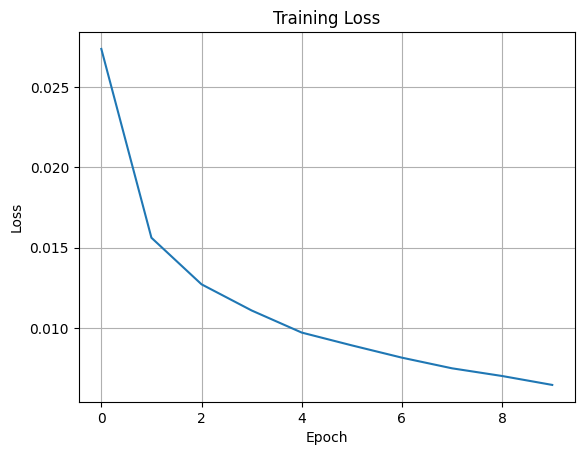

In [8]:
#Step 6: Visualize Training Loss
plt.plot(losses)

plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

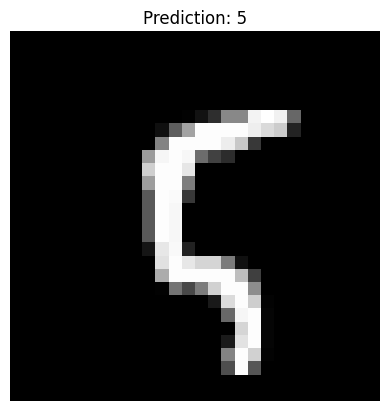

In [9]:
#Step 7: Predict a Sample Digit

def predict(img):
  img = img.reshape(1, 784) / 255.0
  a1 = sigmoid(img @ W1 + b1)
  a2 = sigmoid(a1 @ W2 + b2)
  return np.argmax(a2)

idx = 100
plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predict(X_train[idx])}")
plt.axis('off')
plt.show()